In [ ]:
import pyaudio
import struct
import numpy as np
import matplotlib.pyplot as plt

### Analyze Audacity-exported Fourier spectrum

### PyAudio - Record and Plot

<class 'bytes'>
<class 'tuple'>


(array([6124.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2068.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

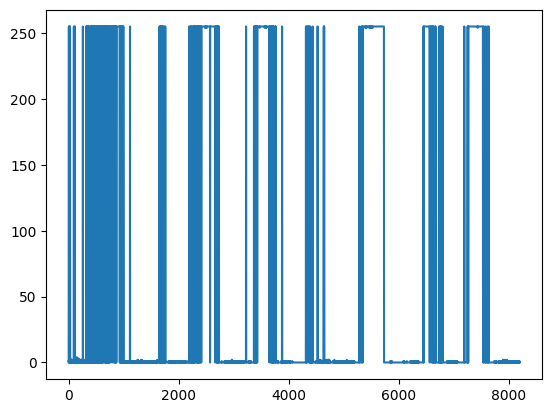

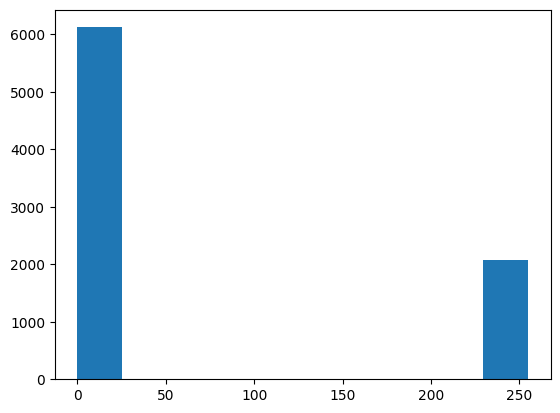

In [ ]:
CHUNK = 1024 * 4
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100 

p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

data = stream.read(CHUNK)
data_int = struct.unpack(str( 2* CHUNK ) + 'B', data)

print(type(data))
print(type(data_int))

%matplotlib inline
plt.plot(data_int)
plt.figure()
plt.hist(data_int)

In [36]:
%matplotlib tk

fig, ax = plt.subplots()

x = np.arange(0, 2*CHUNK, 2)
line, = ax.plot(x, np.zeros(CHUNK))

ax.set_ylim(0, 255)

while True:
    data = stream.read(CHUNK)
    data_int = np.array(struct.unpack(str( 2* CHUNK ) + 'B', data))[::2]
    line.set_ydata(data_int)
    fig.canvas.draw()
    fig.canvas.flush_events()

KeyboardInterrupt: 